<a href="https://colab.research.google.com/github/bini-Bin/forecasting/blob/main/IOM_assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IOM assignment3/IOM assignment3 dataset.csv')

In [ ]:
df['date'] = pd.to_datetime(df.date)
df = df.sort_values(['date'], ascending=True).reset_index()
df

,index,date,pm25,pm10,o3,no2,so2,co
0,20,2022-01-03,50,27,18,25,4,5
1,21,2022-01-04,62,35,5,43,4,8
2,22,2022-01-05,81,40,20,33,6,7
3,23,2022-01-06,90,49,10,52,6,10
4,24,2022-01-07,113,41,11,51,5,9
5,25,2022-01-08,100,75,20,33,4,10
6,26,2022-01-09,167,59,18,53,4,11
7,27,2022-01-10,144,25,20,16,0,5
8,28,2022-01-11,61,23,16,22,4,4
9,29,2022-01-12,58,23,20,16,4,4


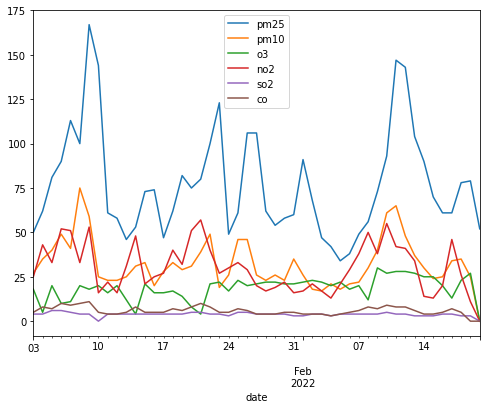

In [ ]:
df.plot(x='date', y=['pm25', 'pm10', 'o3', 'no2', 'so2', 'co'], figsize=(8,6))
plt.show()

In [ ]:
pm25 = pd.DataFrame(df, columns=['date', 'pm25'])
pm25['pm25_avg'] = pm25['pm25'].mean()

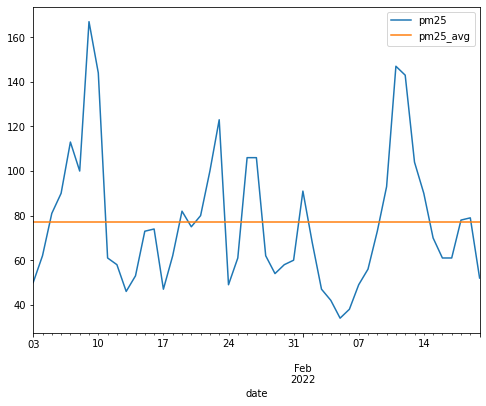

In [ ]:
pm25.plot(x='date', y=['pm25', 'pm25_avg'], figsize=(8,6))
plt.show()

In [ ]:
pm25['pm25_MA2'] = pm25['pm25'].rolling(2).mean()
pm25['pm25_MA5'] = pm25['pm25'].rolling(5).mean()
pm25['pm25_MA10'] = pm25['pm25'].rolling(10).mean()

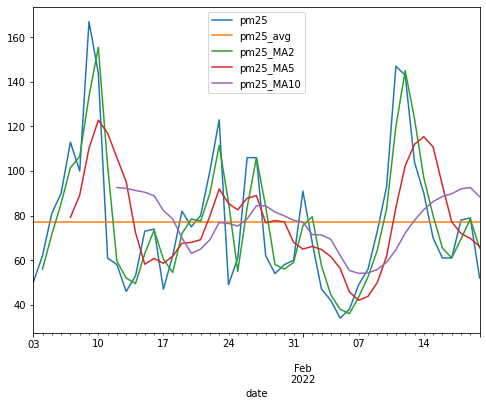

In [ ]:
pm25.plot(x='date', y=['pm25', 'pm25_avg', 'pm25_MA2', 'pm25_MA5', 'pm25_MA10'], figsize=(8,6))
plt.show()

In [ ]:
import numpy as np

pm25['pm25_WMA2'] = pm25['pm25'].rolling(2).apply(lambda x:np.sum(np.array([0.2, 0.8])*x))
pm25['pm25_WMA5'] = pm25['pm25'].rolling(5).apply(lambda x:np.sum(np.array([0.1, 0.15, 0.2, 0.25, 0.3])*x))

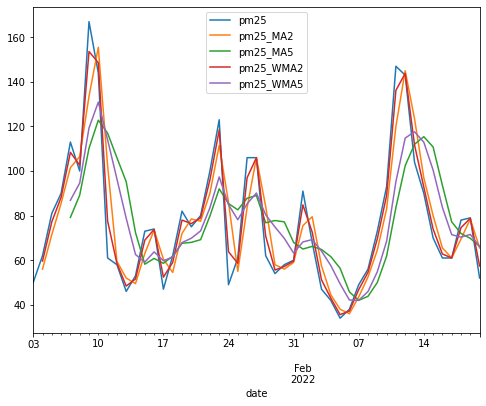

In [ ]:
pm25.plot(x='date', y=['pm25', 'pm25_MA2', 'pm25_MA5', 'pm25_WMA2', 'pm25_WMA5'], figsize=(8,6))
plt.show()

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing

pm25_ES02 = SimpleExpSmoothing(pm25['pm25'], initialization_method='heuristic').fit(
    smoothing_level=0.2, optimized=False
)
pm25_ES05 = SimpleExpSmoothing(pm25['pm25'], initialization_method='heuristic').fit(
    smoothing_level=0.5, optimized=False
)    
pm25_ES08 = SimpleExpSmoothing(pm25['pm25'], initialization_method='heuristic').fit(
    smoothing_level=0.8, optimized=False
)    
pm25['pm25_ES02'] = pm25_ES02.fittedvalues
pm25['pm25_ES05'] = pm25_ES05.fittedvalues
pm25['pm25_ES08'] = pm25_ES08.fittedvalues

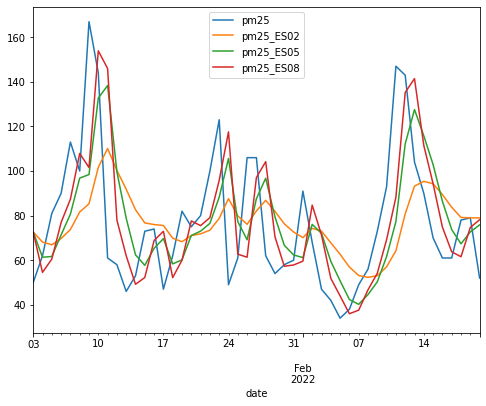

In [ ]:
pm25.plot(x='date', y=['pm25', 'pm25_ES02', 'pm25_ES05', 'pm25_ES08'], figsize=(8,6))
plt.show()

In [ ]:
pm25

,date,pm25,pm25_avg,pm25_MA2,pm25_MA5,pm25_MA10,pm25_WMA2,pm25_WMA5,pm25_ES02,pm25_ES05,pm25_ES08
0,2022-01-03,50,77.0,NaN,NaN,NaN,NaN,NaN,72.666667,72.666667,72.666667
1,2022-01-04,62,77.0,56.0,NaN,NaN,59.6,NaN,68.133333,61.333333,54.533333
2,2022-01-05,81,77.0,71.5,NaN,NaN,77.2,NaN,66.906667,61.666667,60.506667
3,2022-01-06,90,77.0,85.5,NaN,NaN,88.2,NaN,69.725333,71.333333,76.901333
4,2022-01-07,113,77.0,101.5,79.2,NaN,108.4,86.90,73.780267,80.666667,87.380267
5,2022-01-08,100,77.0,106.5,89.2,NaN,102.6,94.60,81.624213,96.833333,107.876053
6,2022-01-09,167,77.0,133.5,110.2,NaN,153.6,119.30,85.299371,98.416667,101.575211
7,2022-01-10,144,77.0,155.5,122.8,NaN,148.6,130.90,101.639497,132.708333,153.915042
8,2022-01-11,61,77.0,102.5,117.0,NaN,77.6,114.00,110.111597,138.354167,145.983008
9,2022-01-12,58,77.0,59.5,106.0,92.6,58.6,96.50,100.289278,99.677083,77.996602


In [ ]:
ME_table = pd.DataFrame()

ME_table['avg'] = pm25['pm25'] - pm25['pm25_avg']
ME_table['MA2'] = pm25['pm25'] - pm25['pm25_MA2']
ME_table['MA5'] = pm25['pm25'] - pm25['pm25_MA5']
ME_table['MA10'] = pm25['pm25'] - pm25['pm25_MA10']
ME_table['WMA2'] = pm25['pm25'] - pm25['pm25_WMA2']
ME_table['WMA5'] = pm25['pm25'] - pm25['pm25_WMA5']
ME_table['ES02'] = pm25['pm25'] - pm25['pm25_ES02']
ME_table['ES05'] = pm25['pm25'] - pm25['pm25_ES05']
ME_table['ES08'] = pm25['pm25'] - pm25['pm25_ES08']


In [ ]:
ME_table.sum(skipna=True)

avg       0.000000
MA2       1.000000
MA5     -23.000000
MA10   -159.400000
WMA2      0.400000
WMA5    -22.400000
ES02      4.552056
ES05    -17.492856
ES08    -19.297789
dtype: float64

In [ ]:
MAE_table = pd.DataFrame()

MAE_table['avg'] = abs(pm25['pm25'] - pm25['pm25_avg'])
MAE_table['MA2'] = abs(pm25['pm25'] - pm25['pm25_MA2'])
MAE_table['MA5'] = abs(pm25['pm25'] - pm25['pm25_MA5'])
MAE_table['MA10'] = abs(pm25['pm25'] - pm25['pm25_MA10'])
MAE_table['WMA2'] = abs(pm25['pm25'] - pm25['pm25_WMA2'])
MAE_table['WMA5'] = abs(pm25['pm25'] - pm25['pm25_WMA5'])
MAE_table['ES02'] = abs(pm25['pm25'] - pm25['pm25_ES02'])
MAE_table['ES05'] = abs(pm25['pm25'] - pm25['pm25_ES05'])
MAE_table['ES08'] = abs(pm25['pm25'] - pm25['pm25_ES08'])

MAE_table.sum(skipna=True)

avg     1154.000000
MA2      465.000000
MA5     1002.600000
MA10     995.800000
WMA2     186.000000
WMA5     821.200000
ES02    1200.781896
ES05    1116.270006
ES08     992.419088
dtype: float64

In [ ]:
MSE_table = pd.DataFrame()

MSE_table['avg'] = (pm25['pm25'] - pm25['pm25_avg'])**2
MSE_table['MA2'] = (pm25['pm25'] - pm25['pm25_MA2'])**2
MSE_table['MA5'] = (pm25['pm25'] - pm25['pm25_MA5'])**2
MSE_table['MA10'] = (pm25['pm25'] - pm25['pm25_MA10'])**2
MSE_table['WMA2'] = (pm25['pm25'] - pm25['pm25_WMA2'])**2
MSE_table['WMA5'] = (pm25['pm25'] - pm25['pm25_WMA5'])**2
MSE_table['ES02'] = (pm25['pm25'] - pm25['pm25_ES02'])**2
MSE_table['ES05'] = (pm25['pm25'] - pm25['pm25_ES05'])**2
MSE_table['ES08'] = (pm25['pm25'] - pm25['pm25_ES08'])**2

MSE_table.sum(skipna=True)

avg     44280.000000
MA2      8715.000000
MA5     32403.880000
MA10    34888.620000
WMA2     1394.400000
WMA5    21912.420000
ES02    45955.507413
ES05    39786.858455
ES08    36234.851979
dtype: float64